In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Some notes:
- About 100 rows are from offices other than the san francisco office - this is because the buisnesses moved from other districts into the San Francisco district.
- Exactly one loan that doesn't have a business type, so I dropped it cause I wanna use buisness type as a dummy


In [3]:
df = pd.read_csv('../data/FOIA_SFDO_504_7A.csv')
df = df[df['SBADistrictOffice']=='SAN FRANCISCO DISTRICT OFFICE<U+00A0>']
df = df[df['BusinessType'].notnull()]
df.drop(['Unnamed: 0', 'Column', 'BorrName', 'BorrStreet', 'BorrCity', 'BorrState', 'BankStreet', 'BankCity','BankState','SBADistrictOffice','ProjectState','ProjectCounty','ThirdPartyLender_State','ThirdPartyLender_Name','ThirdPartyLender_City'], axis=1, inplace=True) #Dropping Borrower information because it's not useful for an analysis standpoint (can reference it at a later date) 
numerical_columns = df.describe().columns
df.describe()


,BorrZip,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,NaicsCode,FranchiseCode,CongressionalDistrict,GrossChargeOffAmount,RevolverStatus,JobsSupported,ThirdPartyDollars
count,44082.000000,44030.000000,4.408200e+04,3.702300e+04,44082.000000,12332.000000,44082.000000,37097.000000,44082.000000,43719.000000,4.408200e+04,37023.000000,44082.000000,2.300000e+03
mean,94493.394537,69718.582807,3.673445e+05,2.247890e+05,2004.454086,5.844035,151.441223,531949.045179,2084.112835,12.475171,1.250027e+04,0.238798,9.004582,1.165148e+06
std,3799.221644,26555.852797,5.197134e+05,3.526589e+05,6.957417,1.845328,91.999411,167185.499081,11110.453934,5.470474,7.774707e+04,0.426355,57.648117,1.408787e+06
min,0.000000,1701.000000,4.500000e+03,2.250000e+03,1991.000000,0.000000,0.000000,111110.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,7.000000e+04
25%,94403.000000,57104.000000,5.000000e+04,2.500000e+04,1999.000000,4.750000,84.000000,424990.000000,0.000000,11.000000,0.000000e+00,0.000000,0.000000,4.117062e+05
50%,94587.000000,80124.000000,1.850000e+05,1.000000e+05,2005.000000,5.750000,120.000000,541211.000000,1.000000,13.000000,0.000000e+00,0.000000,3.000000,7.384875e+05
75%,95051.000000,94596.000000,4.800000e+05,2.812500e+05,2010.000000,7.000000,240.000000,624410.000000,1.000000,17.000000,0.000000e+00,0.000000,8.000000,1.374216e+06
max,99999.000000,99362.000000,5.500000e+06,4.500000e+06,2017.000000,11.500000,429.000000,999990.000000,92006.000000,53.000000,2.328489e+06,1.000000,7256.000000,1.745200e+07


In [27]:
df.dtypes

Program                   object
BorrZip                    int64
BankName                  object
BankZip                  float64
GrossApproval              int64
SBAGuaranteedApproval    float64
ApprovalDate              object
ApprovalFiscalYear         int64
FirstDisbursementDate     object
DeliveryMethod            object
subpgmdesc                object
InitialInterestRate      float64
TermInMonths               int64
NaicsCode                float64
NaicsDescription          object
FranchiseCode              int64
FranchiseName             object
CongressionalDistrict    float64
BusinessType              object
LoanStatus                object
ChargeOffDate             object
GrossChargeOffAmount       int64
RevolverStatus           float64
JobsSupported              int64
ThirdPartyDollars        float64
dtype: object

## Possible Columns to dummify:
- Program - how the buisness accessed its loan
- Bank name - who gave the loan
- Congressional District (?)
- Buisness Type
- NaicsCode
- Whether or not they got a third party loan (and possible how much they get? Not very many third party loans...)

### Looking at Distribution of # of Bank Loans

In [4]:
from operator import itemgetter
bank_loan_count = []
for bank_name in df['BankName'].unique():
    bank_loan_count.append((bank_name, len(df[df['BankName']==bank_name])))
bank_loan_count.sort(key=itemgetter(1), reverse=True)
    


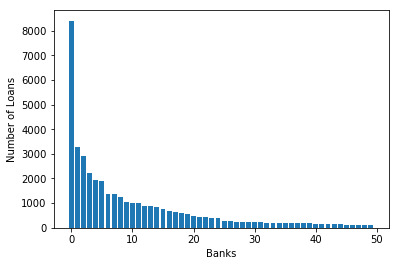

In [7]:
hist_values = [x[1] for x in bank_loan_count]
bank_names = [x[0] for x in bank_loan_count]
plt.bar(np.arange(50), hist_values[0:50])
plt.xlabel('Banks')
plt.ylabel('Number of Loans')